<a href="https://colab.research.google.com/github/kenkoech/AthleteProject/blob/main/Testing_CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
new_model = load_model('/content/drive/MyDrive/New Data/model_finetuned_epoch40_2025-05-04_18-20-23.h5')

<ipython-input-3-8b60f8bca6cc>:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


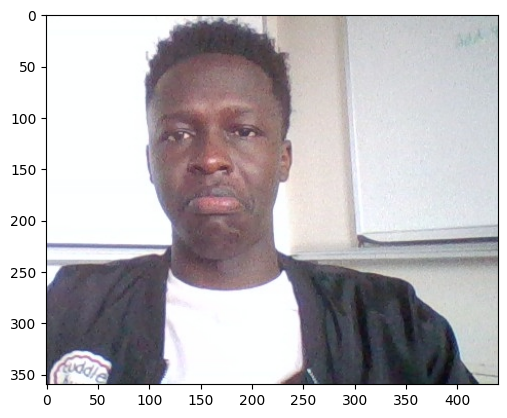

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
[[0.13650644 0.0743662  0.15051894 0.06543893 0.17134044 0.1367953
  0.14765635 0.11737738]]
Happiness


In [3]:
#testing pipeline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr
test_img = cv2.imread('/content/drive/MyDrive/AI Project Data (merged)/Sadness/sad101.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

test_img = cv2.resize(test_img, (224,224))
test_img = test_img/255.0
test_img = np.expand_dims(test_img, 0)
test_predicton = new_model.predict(test_img)

print(test_predicton)
if np.argmax(test_predicton) == 0:
  print('Anger')
elif np.argmax(test_predicton) == 1:
  print('Contempt')
elif np.argmax(test_predicton) == 2:
  print('Disgust')
elif np.argmax(test_predicton) == 3:
  print('Fear')
elif np.argmax(test_predicton) == 4:
  print('Happiness')
elif np.argmax(test_predicton) == 5:
  print('Neutral')
elif np.argmax(test_predicton) == 6:
  print('Sadness')
elif np.argmax(test_predicton) == 7:
  print('Surprise')

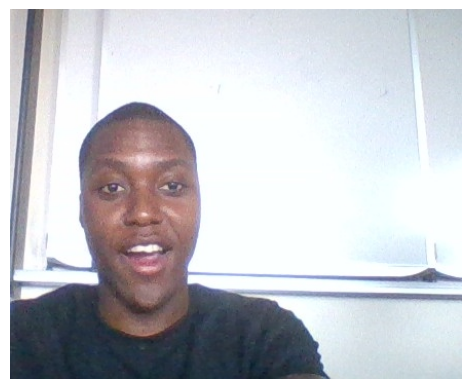

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
Prediction: Surprise


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# === Load Model ===
model = load_model('/content/drive/MyDrive/New Data/model_finetuned_epoch40_2025-05-04_18-20-23.h5')  # Update path

# === Class Labels (in order) ===
class_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# === Load and Show Image ===
img = cv2.imread('/content/drive/MyDrive/AI Project Data (merged)/Surprise/surprise100.jpg')  # Update path
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# === Preprocess Image ===
img = cv2.resize(img, (224, 224))
img = preprocess_input(np.expand_dims(img, axis=0))  # Normalizes like VGG16

# === Predict and Show Result ===
prediction = model.predict(img)
predicted_class = np.argmax(prediction)
print(f"Prediction: {class_names[predicted_class]}")

In [5]:
class_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Neutral', 'Happy', 'Sadness', 'Surprise']
predicted_class = np.argmax(test_predicton)
print(test_predicton)
print(f"Predicted class: {class_names[predicted_class]}")

[[0.13650644 0.0743662  0.15051894 0.06543893 0.17134044 0.1367953
  0.14765635 0.11737738]]
Predicted class: Neutral


In [7]:
Data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/AI Project Data (merged)')
data_iterator = Data.as_numpy_iterator()
batch = data_iterator.next()

Found 8211 files belonging to 8 classes.


In [8]:
#normalizing orparation
Data = Data.map(lambda x,y: (x/255, y))

#split the data set(75:15:10)
train_size = int(len(Data)*.75)
val_size = int(len(Data)*.15)
test_size = int(len(Data)*.1)

train = Data.take(train_size)
val = Data.skip(train_size).take(val_size)
test = Data.skip(train_size+val_size).take(test_size)

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get all test images and labels
y_true = []
y_pred = []

for images, labels in test:
    preds = model.predict(images)
    pred_labels = np.argmax(preds, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(pred_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


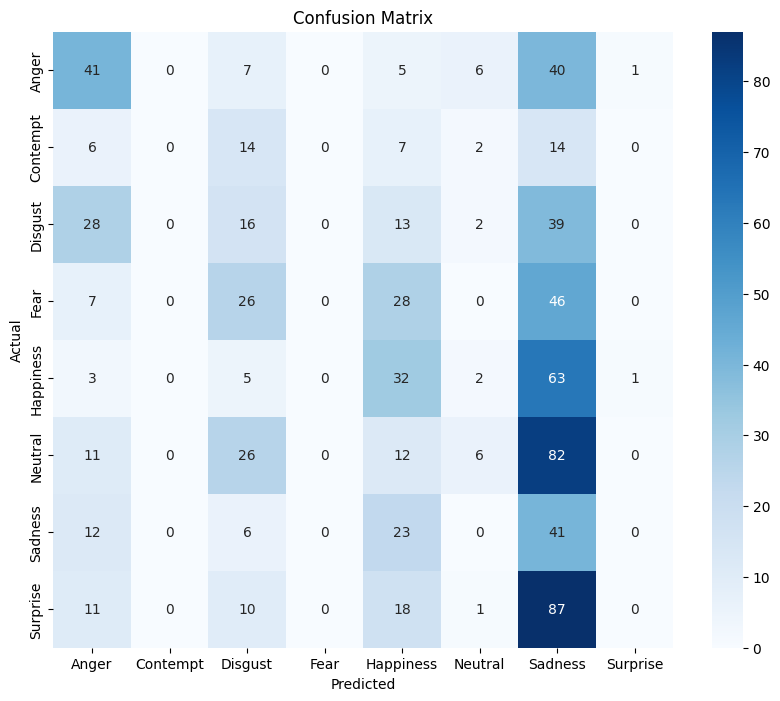

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Define your class names in the correct training order
class_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Build the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot with seaborn
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(cm, index=class_names, columns=class_names),
            annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()